In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
df.isnull().sum().sum()

np.int64(0)

**So there has no null value**

In [37]:
df.duplicated().sum()

np.int64(3)

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [41]:
df['species'].value_counts()

,count
species,
Iris-versicolor,50
Iris-virginica,49
Iris-setosa,48


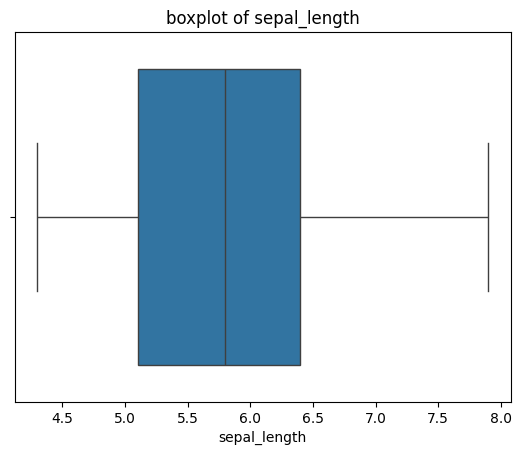

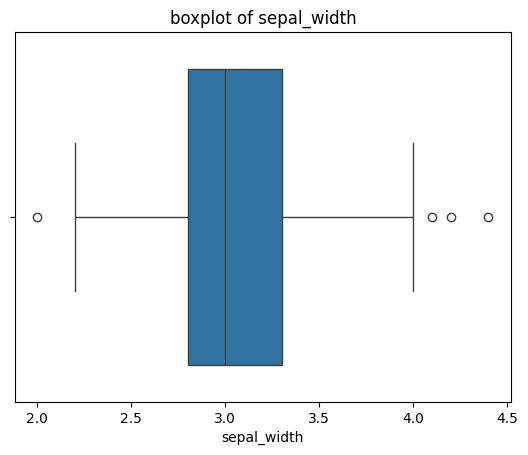

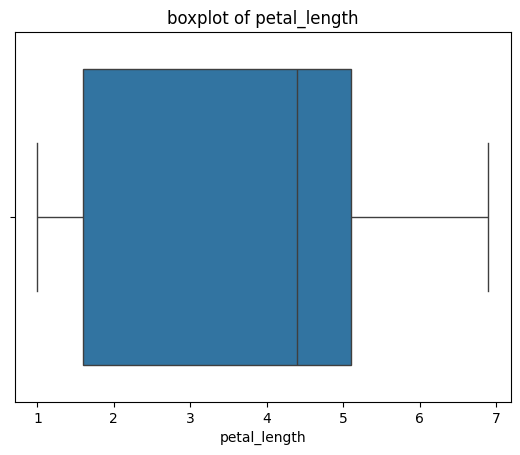

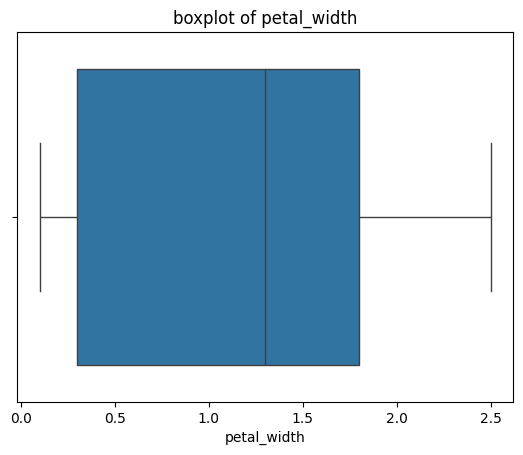

In [42]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
  sns.boxplot(x=df[col])
  plt.title(f'boxplot of {col}')
  plt.xlabel(col)
  plt.show()


In [43]:
#for duplicated the outliers
df_clean=df.copy()
numeric_cols = df_clean.select_dtypes(include='number').columns

for col in numeric_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  Upper_Quantile = Q3 + (0.15 * IQR)
  Lower_quantile = Q1 - (0.15 * IQR)

  #filter the outliers
  df_clean = df_clean[(df_clean[col]<=Upper_Quantile) & (df_clean[col]>=Lower_quantile)]

df_clean

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor


In [44]:
df_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,Iris-setosa
25,5.0,3.0,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
51,6.4,3.2,4.5,1.5,Iris-versicolor


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df_clean['species'] = le.fit_transform(df_clean['species'])

In [47]:
df_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,species
23,5.1,3.3,1.7,0.5,0
25,5.0,3.0,1.6,0.2,0
35,5.0,3.2,1.2,0.2,0
49,5.0,3.3,1.4,0.2,0
51,6.4,3.2,4.5,1.5,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_clean.drop('species', axis=1)
y = df_clean['species']

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and Evaluate
best_model_name = None
best_accuracy = 0

print("Model Accuracies:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.2f}")

    # Save best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

#Best Model
print("\nBest Model:", best_model_name)
print("Accuracy:", round(best_accuracy, 2))

Model Accuracies:
Logistic Regression: 0.86
K-Nearest Neighbors: 0.86
Support Vector Machine: 0.86
Decision Tree: 0.71
Random Forest: 0.86
Gradient Boosting: 0.86

Best Model: Logistic Regression
Accuracy: 0.86


In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(best_accuracy, 2))

Accuracy: 0.86


In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0],
       [1, 2]])

In [53]:
new_IRIS = pd.DataFrame([{
    'sepal_length':6.4,
    'sepal_width':3.3 ,
    'petal_length':1.2,
    'petal_width':1.5
}])

In [57]:
# Apply the same LabelEncoder
# new_house['city'] = le.transform(new_house['city'])

# # Standardize using the same scaler used for training
new_IRIS_scaled = scaler.fit_transform(new_IRIS)

In [58]:
predicted_species = lr.predict(new_IRIS_scaled)

In [64]:
predicted_species_name = le.inverse_transform(predicted_species)
print(predicted_species_name[0])

Iris-versicolor
